In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure, color
import os

In [3]:
path = 'oxford_flowers_102/jpg'
imagelist = os.listdir(path)
len(imagelist)

8189

In [4]:
# This is to eliminate the 'Thumbs.db' filename from the list
if imagelist[-1]=='Thumbs.db':
    imagelist = imagelist[:-1]
len(imagelist)

8189

In [25]:
def imNormalize(image):
    if len(image.shape)==2:
        r = image
        g = image
        b = image
    else:
        r = image[:,:,0]
        g = image[:,:,1]
        b = image[:,:,2]
    
    r = r - r.min()
    r = r / r.max()
    r = np.uint8(r * 255)
    
    g = g - g.min()
    g = g / g.max()
    g = np.uint8(g * 255)
    
    b = b - b.min()
    b = b / b.max()
    b = np.uint8(b * 255)
    
    return np.stack((r,g,b),axis=2) 


def colorHistogram(image):
    image = imNormalize(image)
    image = color.rgb2hsv(image)
    
    h1 = exposure.histogram(image[:,:,0])
    h2 = exposure.histogram(image[:,:,1])
    h3 = exposure.histogram(image[:,:,2])
    h = np.concatenate((h1[0],h2[0],h3[0]), axis = None)
    h = h / (image.shape[0]*image.shape[1])
    return h

In [ ]:
featuresize = 768
features = np.zeros((len(imagelist),featuresize))
for i in range(len(imagelist)):
    image = io.imread(path + '/' + imagelist[i])
    features[i,:] = colorHistogram(image)
    line = '\rProcessing '+ str(i+1) + ' of '+ str(len(imagelist))
    print(line, end='')


Processing 7811 of 8189

(-0.5, 553.5, 499.5, -0.5)

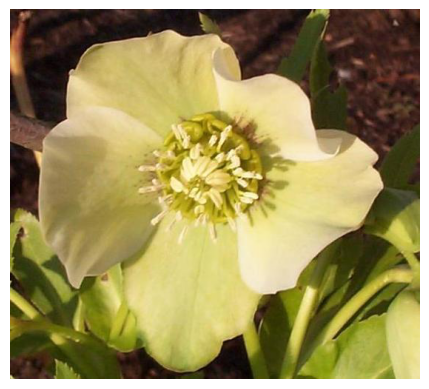

In [21]:
querynum = np.random.randint(len(imagelist))
querynum = 500
queryimage = io.imread(path + '/' + imagelist[querynum])
plt.imshow(queryimage)
plt.axis('off')

In [22]:
def euclideanDistance(a,b):
    a = np.array(a)
    b = np.array(b)
    return np.sqrt(np.sum((a-b)**2))

def manhattanDistance(a,b):
    a = np.array(a)
    b = np.array(b)
    return # put in code here

In [23]:
distances = np.zeros(len(imagelist))
for i in range(len(imagelist)):
    distances[i] = euclideanDistance(features[querynum,:],features[i,:])
    line = '\rProcessing '+ str(i+1) + ' of '+ str(len(imagelist))
    print(line, end='')
    
order = np.argsort(distances)
order

Processing 8189 of 8189

array([ 500, 2579, 6741, ..., 6451, 1167, 7981])

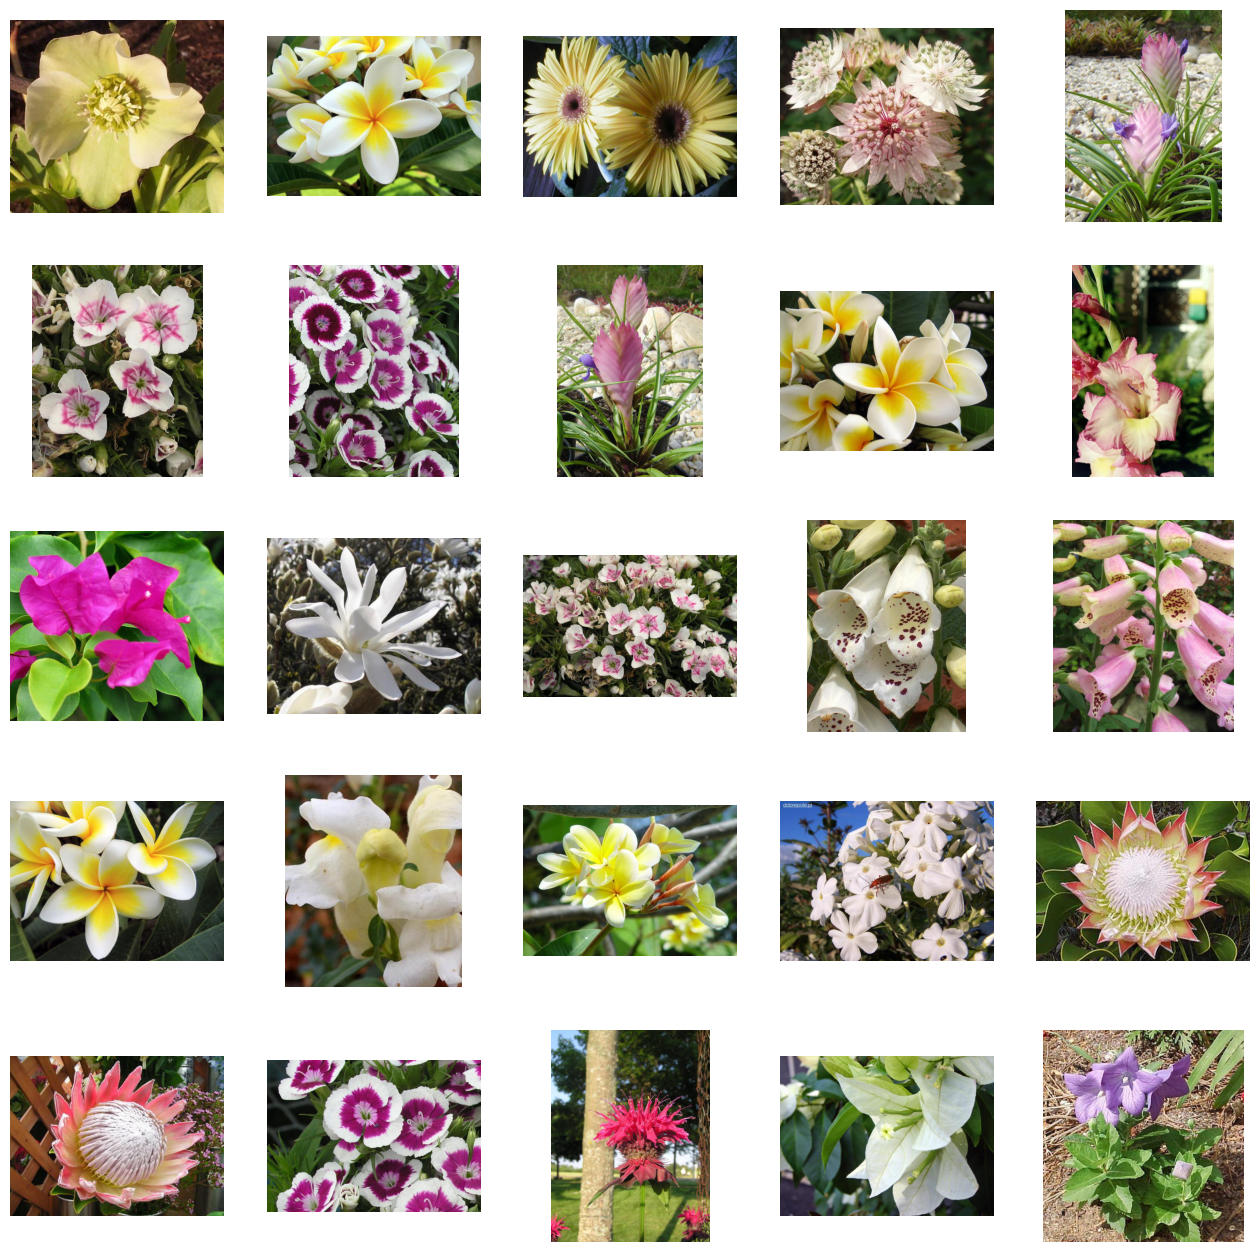

In [24]:
fig = plt.figure(figsize=[16,16])
rows = 5
cols = 5
for i in range(rows*cols):
    image = io.imread(path + '/' + imagelist[order[i]])
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(image)
    plt.axis('off')

plt.show()